In [1]:
%matplotlib inline

In [2]:
import sys
sys.dont_write_bytecode = True
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
from ggplot import *
from dataMethods import *
from testRuns import *
import pandas as pd
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
dataColumns = ['lHR', 'rHR', 'wHR', 'lK', 'rK', 'wK', 'lfaR', 'rfaR', 'wfaR', 'lHitRT', 'rHitRT', 'wHitRT', 'lFaRT'
               , 'rFaRT', 'wFaRT', 'ldP', 'rdP', 'wdP', 'lCrit', 'rCrit', 'wCrit']

In [4]:
def createDF(testRuns):
    data = pd.DataFrame()
    i = 0
    for (s,r) in testRuns:
        stats = extractPerformance(s,r,'stim1')
        leftHRs = stats['lHRs']
        rightHRs = stats['rHRs']
        wholeHRs = stats['wHRs']
        leftKs = stats['lKs']
        rightKs = stats['rKs']
        wholeKs = stats['wKs']
        leftfaRates = stats['lfaRates']
        rightfaRates = stats['rfaRates']
        wholefaRates = stats['wfaRates']
        leftHitRTs = stats['lHitRTs']
        rightHitRTs = stats['rHitRTs']
        wholeHitRTs = stats['wHitRTs']
        leftFaRTs = stats['lFaRTs']
        rightFaRTs = stats['rFaRTs']
        wholeFaRTs = stats['wFaRTs']
        leftdPs = stats['ldPs']
        rightdPs = stats['rdPs']
        wholedPs = stats['wdPs']
        leftCrits = stats['lCrits']
        rightCrits = stats['rCrits']
        wholeCrits = stats['wCrits']
        for key in HFconds:
            row = pd.Series([leftHRs[key],rightHRs[key], wholeHRs[key], leftKs[key], rightKs[key],
                             wholeKs[key], leftfaRates[key], rightfaRates[key], wholefaRates[key],
                            leftHitRTs[key], rightHitRTs[key], wholeHitRTs[key], leftFaRTs[key], 
                              rightFaRTs[key], wholeFaRTs[key], leftdPs[key], rightdPs[key], 
                              wholedPs[key], leftCrits[key], rightCrits[key], wholeCrits[key]],
                            name = str(i), index=dataColumns)
            row['targs'] = str(HFconds[key][0])
            row['dists'] = str(HFconds[key][1])
            row['subj'] = int(s)
            row['run'] = int(r)
            data = data.append(row)
            i += 1
    return data   

In [12]:
pilotData = createDF(pilotTestRuns)
pilotData

,dists,lCrit,lFaRT,lHR,lHitRT,lK,ldP,lfaR,rCrit,rFaRT,...,run,subj,targs,wCrit,wFaRT,wHR,wHitRT,wK,wdP,wfaR
0,0,0.161721,0.0,0.6875,0.0,0.605263,1.300994,0.208333,0.352916,0.0,...,1.0,0.0,1,0.58035,0.0,0.5625,0.0,0.517241,1.475322,0.09375
1,1,0.258590,0.0,0.5625,0.0,0.416667,0.831800,0.250000,0.258590,0.0,...,1.0,0.0,1,0.58035,0.0,0.5625,0.0,0.517241,1.475322,0.09375
2,2,0.352916,0.0,0.4375,0.0,0.205882,0.391212,0.291667,0.161721,0.0,...,1.0,0.0,1,0.58035,0.0,0.5625,0.0,0.517241,1.475322,0.09375
3,0,0.352916,0.0,0.4375,0.0,0.411765,0.391212,0.291667,0.161721,0.0,...,1.0,0.0,2,0.58035,0.0,0.5625,0.0,1.034483,1.475322,0.09375
4,1,0.106328,0.0,0.7500,0.0,1.384615,1.561636,0.187500,0.403708,0.0,...,1.0,0.0,2,0.58035,0.0,0.5625,0.0,1.034483,1.475322,0.09375
5,2,0.106328,0.0,0.7500,0.0,1.384615,1.561636,0.187500,0.403708,0.0,...,1.0,0.0,2,0.58035,0.0,0.5625,0.0,1.034483,1.475322,0.09375


(0, 2)

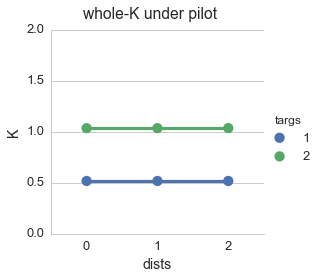

In [6]:
pilotWKPlot = sns.factorplot(data=pilotData,x='dists',y='wK',hue='targs')
pilotWKPlot.fig.suptitle('whole-K under pilot')
pilotWKPlot.set_axis_labels('dists', 'K')
pilotWKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2)

(0, 2)

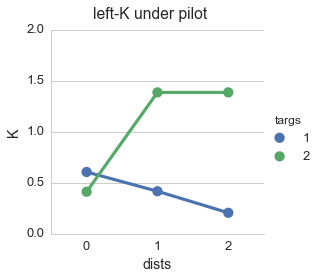

In [7]:
pilotLKPlot = sns.factorplot(data=pilotData,x='dists',y='lK',hue='targs')
pilotLKPlot.fig.suptitle('left-K under pilot')
pilotLKPlot.set_axis_labels('dists', 'K')
pilotLKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2)

(0, 2)

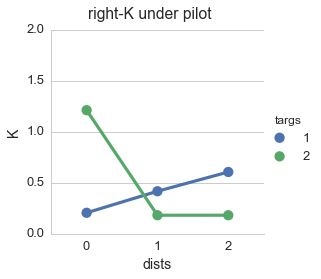

In [8]:
pilotRKPlot = sns.factorplot(data=pilotData,x='dists',y='rK',hue='targs')
pilotRKPlot.fig.suptitle('right-K under pilot')
pilotRKPlot.set_axis_labels('dists', 'K')
pilotRKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2)

(1, 4)

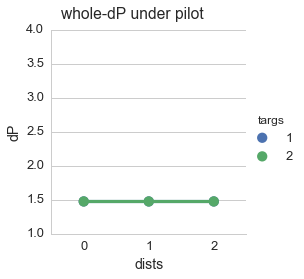

In [9]:
pilotWdPPlot = sns.factorplot(data=pilotData,x='dists',y='wdP',hue='targs')
pilotWdPPlot.fig.suptitle('whole-dP under pilot')
pilotWdPPlot.set_axis_labels('dists', 'dP')
pilotWdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(1, 4)

(0, 2.5)

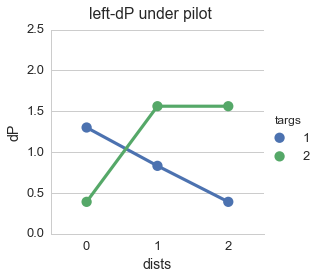

In [10]:
pilotLdPPlot = sns.factorplot(data=pilotData,x='dists',y='ldP',hue='targs')
pilotLdPPlot.fig.suptitle('left-dP under pilot')
pilotLdPPlot.set_axis_labels('dists', 'dP')
pilotLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(0, 2.5)

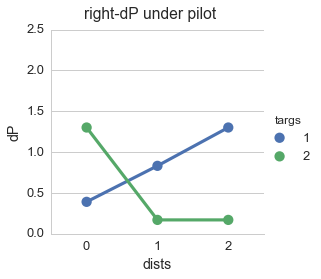

In [11]:
pilotRdPPlot = sns.factorplot(data=pilotData,x='dists',y='rdP',hue='targs')
pilotRdPPlot.fig.suptitle('right-dP under pilot')
pilotRdPPlot.set_axis_labels('dists', 'dP')
pilotRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)